## The Conjugate Gradient Method - Python Implementation and Convergence Analysis
### Math 56 Final Project
### Nikhil Pande

**Introduction**

The conjugate gradient method, often called the steepest descent method, is a method in iterative linear algebra to solve systems with symmetric positive definite matrices. Unlike direct methods, which can perform a series of calculations to derive the solution outright, this algorithm starts with an initial guess for the solution and iteratively generates approximate solutions that converge to the exact solution. With each iteration, the method improves the current solution by minimizing the residual error in a certain direction that is conjugate to the previous search directions.

In what follows, I will first describe the connjugate gradient method algorithm in a general nature. I will then implement this method in python code, producing a function that can take an SPD matrix A and a vector B and use the conjugate gradient method to produce a solution. Next, I will show the error between the method's current estimation for each iteration, and how each iteration reduces error and converges to a solution. I will plot the error on python to show the method's eventual convergence. Finally, I will show how this method does not work for matrices that are not symmetric positive; in most cases, the method may not converge at all.



**The Problem**

First, I will attempt to explain the intuition behind the conjugate gradient method. Thanks to the fascinating and helpful article, "An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" by Jonathan Richard Shewchuk, I was able to grapple with this complicated method. As he writes, many textbooks that discuss the conjugate gradient method provide a mere list of formulas, the relationships between which are left unclear. In order to better understand the method, it is imperative to consult visual interpretations of the more abstract mathematical processes, and some of his excellent visualizations I will use (some are slightly edited by me) in the following explanations.

Firstly, we will begin with the following equation, which much of linear algebra has been created to solve:
<img src="axb.png" style="height: 50px;"/>
In solving this seemingly simple equation, linear algebra can be decomposed into two distinct problem solving strategies: direct, which involves many of the techniques we have learned in class, and iterative, which involve methods that converge to a solution instead of calculating it outright. The conjugate gradient method falls into the latter segment.

As Shewchuk shows, we can derive the simple above equation from the following quadratic vector equation:
<img src="quadvect.png" style="height: 50px;"/>
Now, the question arises: How can we minimize this equation? Using the matrix calculus techniques we learned in class, this quadratic equation can be reduced by taking the derivative/gradient, $ {f'(x)} $:
<img src="quaddf.png" style="height: 50px;"/>
We can now clearly see that, if A is symmetrical (i.e. $A^T = A$), the first two terms combine this equation into $Ax - b$. Seeking to optimize, we set $f'(x) = 0$ and arrive at the well-known equation, $Ax = b$. But what does this mean from a geometric, visual standpoint? Shewchuk's diagram below shows the quadratic vector equation on a 3-dimensional set of axes:
<img src="paraboloid.png" style="width: 300px;"/>
Our mathematical calculations amount to minimizing this equation, which means finding the bottom of the paraboloid. As was shown above, the solution to $Ax = b$ corresponds with the minimization of this function.  We now have the relevant context to consider the process of the conjugate gradient method.

**The Conjugate Gradient Method (Method of Steepest Descent)**

Uisng the image of the paraboloid, the intuition behind cgs is as follows: we will begin with an arbitrary point $x_{0}$ (in our algorithm we will default this to the zero-vector). We then slide down the paraboloid in the direction of steepest descent to calculate $x_{1}$, then repeat the same process for $x_{2}, x_{3},..., x_{n}$.

The direction of steepest descent is the opposite direction of $f'(x_{i})$, which is $-f'(x_{i})$. Since we know the derivative of f amounts to $Ax = b$, then $-f'(x_{i}) = b - Ax_{i}$. We deem this value the _residual_, or the difference between our calculation and the correct value of $b$.

If we begin at $x_{0} = [0, 0]^T$, then we can utilize the iterative formula:
<img src="step.png" style="height: 30px;"/>
Now, how should we calculate the step size $\alpha$? To do this, we can perform a line search along the direction of $x_{0}$, the previous guess, and end at the point where $r_{0}$ and $f'(x_{1})$ are orthagonal, for that way we stop and turn into the new direction of steepest descent. We can perform the following series of calculations, made clear by Shewchuk, to derive the formula for $\alpha$:
<img src="alphacalc.png" style="height: 200px;"/>
With this step sisze, we can now iteratively calculate values of $x$. After a certain number of iterations, our residual will fall within a satisfactory margin of the correct vector for $b$, and we will be satisfied with our solution for $x$. 

To make the entire process clear, the following visualization demonstrates our successive calculations for $x_{i}$. A contour graph for the above parabola is shown below (taken from Shewchuk's article), with the black dot marking the center, or the point we are seeking. The black lines were added by me, and they represent the linear searches and changes of direction as we hone in on a solution for the minimum value of the parabola, or the solution to $Ax = b$.
<img src="contourdescent.png" style="width: 300px;"/>
Now that we have a clear idea of how the conjugate gradient method works, we can establish a python algorithm that calculates the solution to a linear system using this iterative method.

### **Python Implementation of CGS**

In [42]:
import numpy as np

# The following function solves the linear system Ax=b using the conjugate gradient method.
def conjugate_gradient(A, b, x0=None, tol=1e-6, max_iter=None):
    """
    Arguments:
    A (ndarray): The transformation matrix A in Ax=b.
    b (ndarray): The solution vector b in Ax=b.
    x0 (ndarray, optional): The initial guess for the solution. Default is a zero array
    tol (float, optional): The tolerance for convergence. Default is 1e-6.
    max_iter (int, optional): The maximum number of iterations. Default is the length of b.

    Returns:
    ndarray: The solution x to the linear system Ax=b.
    int: The number of iterations required to converge.
    """
    
    n = len(b)
    if max_iter is None:
        max_iter = n
    
    if x0 is None:
        x0 = np.zeros(n)

    r0 = b - A.dot(x0)
    p0 = r0
    x = x0
    r_norm_sq_prev = np.dot(r0, r0)

    for i in range(max_iter):
        Ap = A.dot(p0)
        alpha = r_norm_sq_prev / np.dot(p0, Ap)
        x = x + alpha * p0            ## x guess
        r = r0 - alpha * Ap           ## residual calculation
        r_norm_sq = np.dot(r, r)
        
        if np.sqrt(r_norm_sq) < tol: ## if our calculation is within the error tolerance, 
            return x, i+1            ## return it and the number of iterations it required
       
        beta = r_norm_sq / r_norm_sq_prev
        p = r + beta * p0
        r0 = r
        p0 = p
        r_norm_sq_prev = r_norm_sq

    return x, max_iter

The following is a test of this method on an example problem $Ax = b$ with $A$ $2x2$ and $b$ of dimension 2. The method uses two iterations to solve the system, and the example prints the initial guess, the intermediate solution, and the final solution.

In [50]:
# Example usage
A1 = np.array([[4, 1], [1, 3]])
b1 = np.array([1, 2])
init_guess = np.zeros(2)

x1, num_iter1 = conjugate_gradient(A1, b1, init_guess, max_iter = 1)
x2, num_iter2 = conjugate_gradient(A1, b1, init_guess, max_iter = 2)

print("Initial guess:", init_guess, "\n")

print("Solution 1:", x1)
print("Number of iterations:", num_iter1, "\n")

print("Solution (final):", x2)
print("Number of iterations:", num_iter2, "\n")

print("Exact solution:", np.linalg.solve(A1, b1))

Initial guess: [0. 0.] 

Solution 1: [0.25 0.5 ]
Number of iterations: 1 

Solution (final): [0.09090909 0.63636364]
Number of iterations: 2 

Exact solution: [0.09090909 0.63636364]


### **Importance of SPD Matrices**

As we have determined before, the conjugate gradient method is only applicable for matrices of type symmetric positive definite (SPD). Why is that?

Let's think back to the mathematical process above. When we minimize the quadradict vector equation, we can interpret this as finding the minimum of the paraboloid function. However, what if there were multiple local minimums, and how can we know that the solution to $f'(x) = 0$ that we are finding is a minimum?

Clearly, we reqire symmetry to simplify the above equation for $f'(x)$ into the equation $Ax = b$. But if our matrix is positive definite as well, we can be sure that the function assumes the form of a paraboloid, and thus our methods will always return a minimized solution.

We can test our methods with a non-SPD matrix. If we fail to input an SPD matrix, this strategy will fail:

In [44]:
## Plot error with a non-SPD matrix:

A3 = np.array([[10, 2, 0, 4, 0],
              [2, 2, -1, 0, 1],
              [0, -5, 8, 1, 0],
              [0, 0, 1, 7, -2],
              [0, 0, 2, -2, 6]])
b3 = [12, 10, 2, 3, 5]

exact = np.linalg.solve(A3, b3)
nikhil = conjugate_gradient(A3, b3)[0]

print("NumPy's system solver: ", exact)
print("The cgs method I wrote: ", nikhil)
print("The total norm error is: ", np.linalg.norm(nikhil - exact), "\n")

NumPy's system solver:  [-0.25707155  8.93760399  5.93926789 -0.82612313 -1.421797  ]
The cgs method I wrote:  [-1.70627187 11.87845044  7.27487088 -1.5799881  -2.91961458]
The total norm error is:  3.917188362504283 



### **Visualizing convergence**

Now, we can visualize the convergence of the conjugate gradient method by plotting the method's error for each iteration, from the initial guess to its ultimate output.

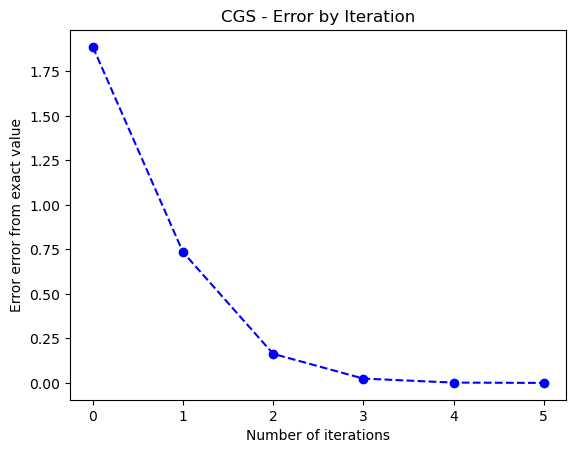

In [45]:
import matplotlib.pyplot as plt


# Define the input matrices
A2 = np.array([[10, 2, 0, 0, 0],
              [2, 9, -1, 0, 0],
              [0, -1, 8, 1, 0],
              [0, 0, 1, 7, -2],
              [0, 0, 0, -2, 6]])
b2 = [12, 10, 2, 3, 5]

# Vary the number of iterations and compute the error for each number
def error_plot_iter(A, b, tick_size = 1.0):
    num_iters = np.arange(0, len(b)+1)
    errors = np.zeros_like(num_iters, dtype=np.float64)
    x_exact = np.linalg.solve(A, b)

    for i, iters in enumerate(num_iters):
        x = conjugate_gradient(A, b, max_iter=iters)[0]
        errors[i] = np.linalg.norm(x - x_exact)

    # Plot the results
    plt.plot(num_iters, errors, 'bo--')
    plt.xlabel('Number of iterations')
    plt.ylabel('Error error from exact value')
    plt.xticks(np.arange(0, len(b)+1, tick_size))
    plt.title('CGS - Error by Iteration')
    plt.show()
    
    
error_plot_iter(A2, b2)


Let's perform this convergence analysis on a matrix of much bigger size, with a much bigger range of iterations.

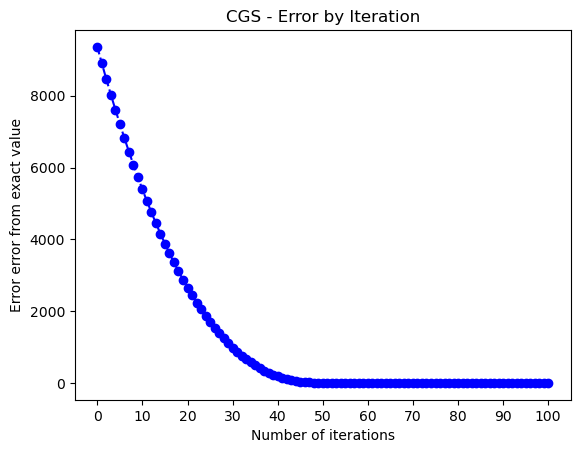

In [46]:
# Define the matrix and right-hand side vector
# the following produces an SPD matrix of shape 100x100
n = 100
A = np.diag(2 * np.ones(n)) - np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
b = np.ones(n)

error_plot_iter(A, b, 10)



From this graph especially, it is clear that the iterable solution closes in on the solution in less than n iterations, given matrix dimensions nxn. Now, it becomes worthwhile to toggle around with the optional tolerance parameter to see how long it takes for the method to reach various levels of convergence.

Range of tolerances:  [60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5]
# of iters per tol:  [9, 12, 16, 19, 23, 26, 30, 33, 37, 40, 44, 47]


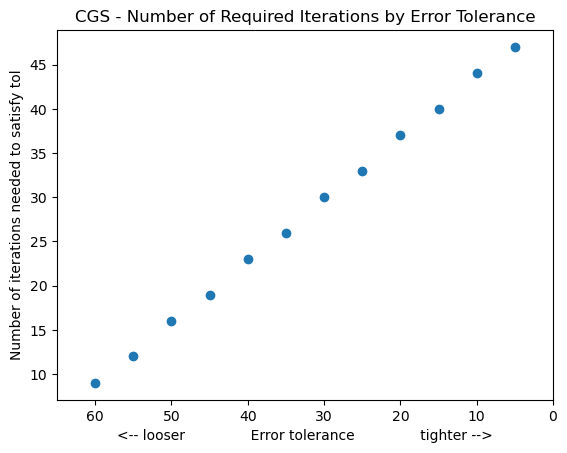

In [52]:
# same example matrix as above
n = 100
A = np.diag(2 * np.ones(n)) - np.diag(np.ones(n-1), 1) - np.diag(np.ones(n-1), -1)
b = np.ones(n)

def plot_tolerance(A, b):
    # create array of tolerances to check
    tolerances = []
    for i in range(60, 0, -5):
        tolerances.append(i)

    # create array of number of iterations
    iters = []
    for tol in tolerances:
        iters.append(conjugate_gradient(A, b, tol = tol)[1])
    
    print("Range of tolerances: ", tolerances)
    print("# of iters per tol: ", iters)
    
    # Plot the results
    plt.plot(tolerances, iters, 'o')
    plt.xlim((max(tolerances) + 5, min(tolerances) - 5))
    plt.xlabel('<-- looser               Error tolerance               tighter -->')
    plt.ylabel('Number of iterations needed to satisfy tol')
    plt.title('CGS - Number of Required Iterations by Error Tolerance')
    plt.show()
    
plot_tolerance(A, b)


As we can see from the graph, as we tighten our error tolerance for the solution, the number of iterations the method takes to satisfy this tolerance increases almost linearly. Of course, if the error tolerance were to converge to zero, it would require as many iterations as dimensions of the solution vector, and even then, when considering infinitesmal levels of variance, the method would not produce and exact solution.

### **Wrap Up**

One final point of interest is that the conjugate gradient method works best for sparse matrices, in order to limit the amount of total calculations. If matrices are dense, it may be preferable to utilize a direct method, such as matrix factorization and back-substitution. However, in the case of sparse matrices, factoring these matrices may result in triangular matrices that are more dense than the original matrix, leading to more floating-point operations. This factorization technique also takes more memory than the iterative solutions. Thus, these sparse matrices are best solved through iterative methods that use less memory and require less floating-point operations, maximizing computational efficiency.

The previous sections work to explain the conjugate gradient method for symmetric positive definite matrices, produce a python algorithm that implements it, and run a series of numerical tests on its convergence to the $x$ solution and error tolerance. These numerical experiments show how the conjugate gradient method, and my implementation of it, successfully converge to the solution to the matrix-vector equation, $Ax = b$. They also show how the error tolerance affects the number of iterations necessary to reach a satisfactory solution, a linear relationship.

This method showcases an efficient way to solve matrix-vector equations in iterative ways, using less memory and computational strain. It can be and has been utilized in all types of fields, from engineering to chemistry to quanitative finance.



Sources:

"An Introduction to the Conjugate Gradient Method Without the Agonizing Pain" by Jonathan Richard Shewchuk, Carnegie Mellon University, August 4, 1944